In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [354]:
df1 = pd.read_csv("data/train_set.csv")
df1["test_train"] = "train"
df2 = pd.read_csv("data/test_set.csv")
df2["test_train"] = "test"

df = pd.concat([df1, df2], ignore_index=True)

In [355]:
df.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,test_train
0,0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,...,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0,train
1,1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,...,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0,train
2,2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,...,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0,train
3,3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,...,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0,train
4,4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,...,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0,train


### Check the dtypes

In [356]:
df.isna().sum()

index               0
Suburb              0
Address             0
Rooms               0
Type                0
Price            8148
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
test_train          0
dtype: int64

### Drop unescessary columns  

In [357]:
df.drop(columns=['index'], inplace=True)

### Split the Col Names based on the Dtype

In [358]:

# Assuming df is your DataFrame
int_columns = []
float_columns = []
object_columns = []

for column in df.columns:
    dtype = df[column].dtype
    if dtype == 'int64' or dtype == 'int32' or dtype == 'int16' or dtype == 'int8':
        int_columns.append(column)
    elif dtype == 'float64' or dtype == 'float32' or dtype == 'float16':
        float_columns.append(column)
    elif dtype == 'object':
        object_columns.append(column)

print("Integer columns:", int_columns)
print("Float columns:", float_columns)
print("Object columns:", object_columns)

Integer columns: ['Rooms']
Float columns: ['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
Object columns: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname', 'test_train']


### Basic Cleaning for Each Type

### Missing Value using Simple Imputer


In [359]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'test_train'],
      dtype='object')

In [360]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Find columns with missing values
cols_with_missing_values = df.columns[df.isna().any()]
cols_with_missing_values

Index(['Price', 'Car', 'BuildingArea', 'YearBuilt', 'CouncilArea'], dtype='object')

In [338]:
# Select features with missing values for predictive imputation
missing_rows =df.isna().any(axis=1)
missing_rows.value_counts()

True     11084
False     2496
Name: count, dtype: int64

In [339]:
# Step 2: Select only the object columns among those columns

# Step 3: Perform label encoding on object columns with missing values
label_encoder = LabelEncoder()
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])

display(df)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,test_train
0,1,5901,4,0,1380000.0,4,155,6,7.5,3040.0,...,2.0,766.0,NaN,NaN,21,-37.75595,144.90551,6,1543.0,1
1,217,11492,2,0,1100000.0,3,106,22,5.5,3070.0,...,1.0,189.0,NaN,NaN,6,-37.77670,144.99240,2,11364.0,1
2,22,9227,3,0,1480000.0,0,106,12,9.2,3104.0,...,4.0,605.0,116.00,1950.0,2,-37.79510,145.06960,5,7809.0,1
3,46,2347,3,0,1055000.0,1,155,52,5.2,3056.0,...,1.0,324.0,NaN,1930.0,23,-37.76530,144.95860,2,11918.0,1
4,279,6075,4,0,1000000.0,4,260,9,13.8,3107.0,...,2.0,728.0,164.00,1970.0,15,-37.76800,145.10270,0,5420.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,202,8071,3,0,NaN,1,139,2,6.9,3039.0,...,1.0,395.0,NaN,NaN,21,-37.75930,144.92760,6,6232.0,0
13576,272,12935,3,0,NaN,1,16,45,13.5,3020.0,...,2.0,538.0,NaN,NaN,3,-37.79520,144.81260,6,6763.0,0
13577,80,5553,3,1,NaN,1,16,8,7.8,3058.0,...,2.0,120.0,113.76,1990.0,23,-37.74620,144.97950,2,11204.0,0
13578,231,2976,4,0,NaN,1,260,11,14.7,3030.0,...,2.0,448.0,190.00,2012.0,30,-37.89140,144.72014,6,15542.0,0


In [340]:
df_missing  = df[missing_rows] 
df = df[~missing_rows]

In [341]:
df_missing

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,test_train
0,1,5901,4,0,1380000.0,4,155,6,7.5,3040.0,...,2.0,766.0,NaN,NaN,21,-37.75595,144.90551,6,1543.0,1
1,217,11492,2,0,1100000.0,3,106,22,5.5,3070.0,...,1.0,189.0,NaN,NaN,6,-37.77670,144.99240,2,11364.0,1
3,46,2347,3,0,1055000.0,1,155,52,5.2,3056.0,...,1.0,324.0,NaN,1930.0,23,-37.76530,144.95860,2,11918.0,1
6,136,6292,3,0,1510000.0,0,260,1,9.2,3146.0,...,2.0,370.0,NaN,NaN,2,-37.85970,145.08830,5,10412.0,1
9,272,6101,4,0,645400.0,1,16,53,13.5,3020.0,...,3.0,765.0,NaN,NaN,3,-37.78600,144.81500,6,6763.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,202,8071,3,0,NaN,1,139,2,6.9,3039.0,...,1.0,395.0,NaN,NaN,21,-37.75930,144.92760,6,6232.0,0
13576,272,12935,3,0,NaN,1,16,45,13.5,3020.0,...,2.0,538.0,NaN,NaN,3,-37.79520,144.81260,6,6763.0,0
13577,80,5553,3,1,NaN,1,16,8,7.8,3058.0,...,2.0,120.0,113.76,1990.0,23,-37.74620,144.97950,2,11204.0,0
13578,231,2976,4,0,NaN,1,260,11,14.7,3030.0,...,2.0,448.0,190.00,2012.0,30,-37.89140,144.72014,6,15542.0,0


In [342]:






df_non_missing = df.copy()
y = df_non_missing[cols_with_missing_values]
X = df_non_missing.loc[:,  ~df_non_missing.columns.isin(cols_with_missing_values)]



In [343]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer





# Train a RandomForestRegressor model to predict missing values
imputer_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the entire training set
imputer_model.fit(df.loc[:,  ~df.columns.isin(cols_with_missing_values)], df[cols_with_missing_values])

# Predict missing values in the training set

df_missing[cols_with_missing_values] = imputer_model.predict(df_missing.loc[:,  ~df_missing.columns.isin(cols_with_missing_values)])

concatenated_df = pd.concat([df_non_missing, df_missing])

# If you want to reset the index of the concatenated DataFrame
concatenated_df.reset_index(drop=True, inplace=True)

In [345]:

for col in object_columns:
    concatenated_df[col] = label_encoder.fit_transform(concatenated_df[col])

display(df)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,test_train
2,22,9227,3,0,1480000.0,0,106,12,9.2,3104.0,...,4.0,605.0,116.0,1950.0,2,-37.7951,145.0696,5,7809.0,1
4,279,6075,4,0,1000000.0,4,260,9,13.8,3107.0,...,2.0,728.0,164.0,1970.0,15,-37.7680,145.1027,0,5420.0,1
5,80,8831,2,2,650000.0,1,16,40,7.8,3058.0,...,1.0,136.0,81.0,1975.0,23,-37.7449,144.9754,2,11204.0,1
7,229,10011,3,2,600000.0,1,155,48,9.9,3044.0,...,1.0,204.0,124.0,2008.0,23,-37.7234,144.9497,2,7485.0,1
8,234,5637,4,0,1260000.0,3,155,10,8.8,3072.0,...,2.0,654.0,150.0,1950.0,6,-37.7365,145.0173,2,14577.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,18,12389,3,0,705000.0,1,155,24,10.5,3034.0,...,1.0,581.0,106.0,1960.0,21,-37.7691,144.8575,6,4502.0,1
5423,282,4796,1,2,365000.0,1,140,2,6.5,3071.0,...,1.0,0.0,40.0,1970.0,6,-37.7544,145.0092,2,8870.0,1
5424,260,2156,1,2,425000.0,4,85,13,1.2,3006.0,...,1.0,0.0,57.0,2004.0,18,-37.8245,144.9622,5,8400.0,1
5430,30,5278,2,0,722000.0,1,32,13,13.9,3165.0,...,1.0,201.0,79.0,2005.0,8,-37.9293,145.0657,5,10969.0,1


#### Integer

In [ ]:
df[int_columns]

,Rooms
0,4
1,2
2,3
3,3
4,4
...,...
13575,3
13576,3
13577,3
13578,4


#### Null Check

In [ ]:
print("Number of Null:  ",df[int_columns].isna().sum())

Number of Null:   Rooms    0
dtype: int64


array([[<Axes: title={'center': 'Rooms'}>]], dtype=object)

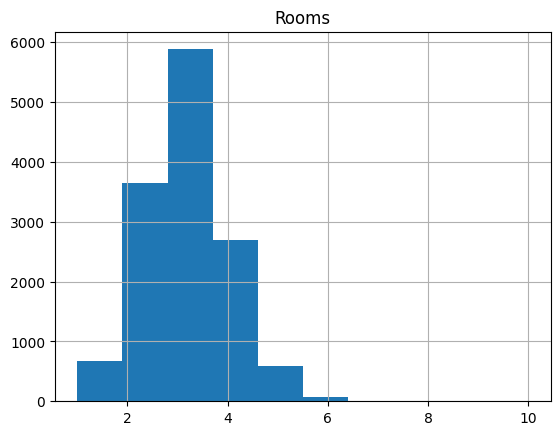

In [ ]:
df[int_columns].hist()

#### Missing Value 

In [ ]:
df[int_columns].value_counts()

Rooms
3        5881
2        3648
4        2688
1         681
5         596
6          67
7          10
8           8
10          1
Name: count, dtype: int64

#### Float

In [ ]:
print("Number of Null:  \n",df[float_columns].isna().sum())

Number of Null:  
 Price            8148
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64


The car, building area m yearbuilt will be missing will have to something with EDA

In [ ]:
df.loc[df["Car"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,test_train
342,Albert Park,121 Richardson St,3,h,1960000.0,S,hockingstuart,16/09/2017,3.0,3206.0,...,NaN,152.0,161.0,1900.0,NaN,-37.84662,144.95675,Southern Metropolitan,3280.0,train
519,Carlton North,242 Canning St,2,h,1540000.0,S,Jellis,19/08/2017,3.5,3054.0,...,NaN,158.0,112.0,1890.0,NaN,-37.79212,144.97409,Northern Metropolitan,3106.0,train
700,Armadale,22 Gladstone Av,3,h,1500000.0,VB,hockingstuart,23/09/2017,6.3,3143.0,...,NaN,230.0,115.0,1900.0,NaN,-37.86275,145.02364,Southern Metropolitan,4836.0,train
807,Sunshine North,5 Berkshire Rd,3,h,595000.0,SP,Barry,26/08/2017,10.5,3020.0,...,NaN,589.0,NaN,NaN,NaN,-37.76599,144.84445,Western Metropolitan,4217.0,train
899,Albert Park,59 Moubray St,3,h,2100000.0,VB,Cayzer,23/09/2017,3.0,3206.0,...,NaN,137.0,125.0,1890.0,NaN,-37.84388,144.95303,Southern Metropolitan,3280.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12303,South Melbourne,349 Park St,2,h,NaN,S,Greg,9/09/2017,1.9,3205.0,...,NaN,140.0,NaN,NaN,NaN,-37.83745,144.95459,Southern Metropolitan,5943.0,test
12487,Carlton North,125 Newry St,2,h,NaN,VB,Nelson,9/09/2017,3.5,3054.0,...,NaN,97.0,NaN,NaN,NaN,-37.78990,144.97112,Northern Metropolitan,3106.0,test
12637,South Melbourne,16 Mountain St,3,h,NaN,SP,Marshall,19/08/2017,1.9,3205.0,...,NaN,128.0,130.0,1880.0,NaN,-37.83731,144.95057,Southern Metropolitan,5943.0,test
12924,Cremorne,22 Cubitt St,2,h,NaN,SP,Jellis,9/09/2017,2.4,3121.0,...,NaN,160.0,NaN,NaN,NaN,-37.82647,144.99264,Northern Metropolitan,1123.0,test


In [ ]:
df["Car"].value_counts()

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [ ]:
df[float_columns].corr()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Price,1.000000,-0.167654,0.093127,0.460544,0.459137,0.227902,0.048182,0.061963,-0.352157,-0.206769,0.199303,-0.038241
Distance,-0.167654,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.093127,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.460544,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.459137,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.227902,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.048182,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.061963,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.352157,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361
Lattitude,-0.206769,-0.130723,-0.406104,0.015925,-0.070594,-0.001963,0.009695,0.043420,0.060445,1.000000,-0.357634,0.047086


filling car based on analysing the price

In [ ]:
df["Price"]

0        1380000.0
1        1100000.0
2        1480000.0
3        1055000.0
4        1000000.0
           ...    
13575          NaN
13576          NaN
13577          NaN
13578          NaN
13579          NaN
Name: Price, Length: 13580, dtype: float64

<Axes: >

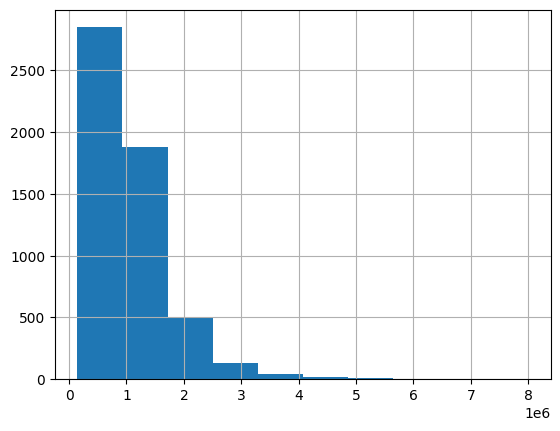

In [ ]:
df["Price"].hist()

<Axes: >

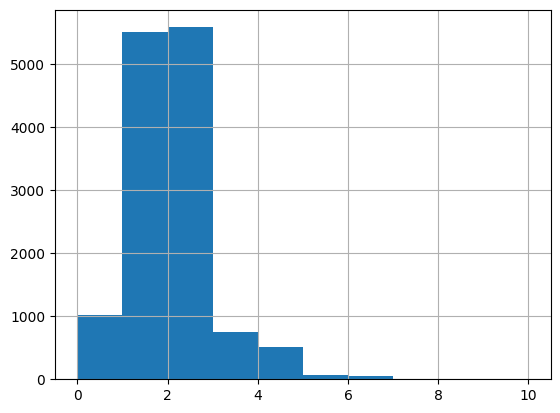

In [ ]:
df["Car"].hist()

In [ ]:
# Calculate the mode of the "Car" column
car_mode = df['Car'].mode()[0]

# Fill missing values with the mode
df['Car'] = df['Car'].fillna(car_mode)

<Axes: >

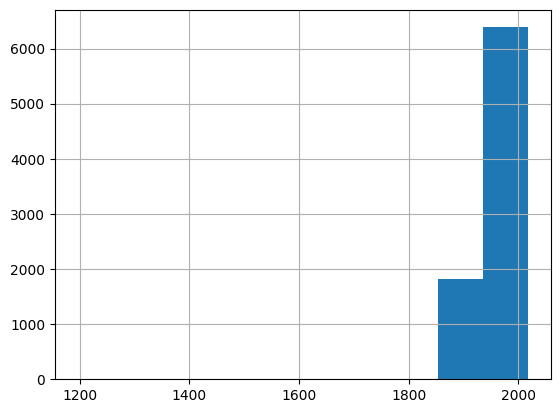

In [ ]:
df["YearBuilt"].hist()

In [ ]:
# Calculate the median of col1
median_value = df['YearBuilt'].median()

# Fill missing values with the median
df['YearBuilt'] = df['YearBuilt'].fillna(median_value)

In [ ]:
# Calculate the median of col1
median_value = df['BuildingArea'].median()

# Fill missing values with the median
df['BuildingArea'] = df['BuildingArea'].fillna(median_value)

In [ ]:
df["Price"] = np.log1p(df["Price"])



In [ ]:
df.drop(columns=["Address",])

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,test_train
0,Aberfeldie,4,h,14.137595,VB,Nelson,12/08/2017,7.5,3040.0,4.0,...,2.0,766.0,126.00,1970.0,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0,train
1,Northcote,2,h,13.910822,SP,Jellis,20/05/2017,5.5,3070.0,2.0,...,1.0,189.0,126.00,1970.0,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0,train
2,Balwyn North,3,h,14.207553,PI,Jellis,15/10/2016,9.2,3104.0,3.0,...,4.0,605.0,116.00,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0,train
3,Brunswick,3,h,13.869052,S,Nelson,7/05/2016,5.2,3056.0,3.0,...,1.0,324.0,126.00,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0,train
4,Templestowe Lower,4,h,13.815512,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,...,2.0,728.0,164.00,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Moonee Ponds,3,h,NaN,S,McDonald,10/12/2016,6.9,3039.0,3.0,...,1.0,395.0,126.00,1970.0,Moonee Valley,-37.75930,144.92760,Western Metropolitan,6232.0,test
13576,Sunshine West,3,h,NaN,S,Barry,3/12/2016,13.5,3020.0,3.0,...,2.0,538.0,126.00,1970.0,Brimbank,-37.79520,144.81260,Western Metropolitan,6763.0,test
13577,Coburg,3,t,NaN,S,Barry,13/05/2017,7.8,3058.0,3.0,...,2.0,120.0,113.76,1990.0,Moreland,-37.74620,144.97950,Northern Metropolitan,11204.0,test
13578,Point Cook,4,h,NaN,S,hockingstuart,15/07/2017,14.7,3030.0,4.0,...,2.0,448.0,190.00,2012.0,Wyndham,-37.89140,144.72014,Western Metropolitan,15542.0,test


In [ ]:
for i in df.columns:
    print(i," - ", df[i].iloc[:3])

Suburb  -  0      Aberfeldie
1       Northcote
2    Balwyn North
Name: Suburb, dtype: object
Address  -  0    241 Buckley St
1     67 Charles St
2        42 Maud St
Name: Address, dtype: object
Rooms  -  0    4
1    2
2    3
Name: Rooms, dtype: int64
Type  -  0    h
1    h
2    h
Name: Type, dtype: object
Price  -  0    14.137595
1    13.910822
2    14.207553
Name: Price, dtype: float64
Method  -  0    VB
1    SP
2    PI
Name: Method, dtype: object
SellerG  -  0    Nelson
1    Jellis
2    Jellis
Name: SellerG, dtype: object
Date  -  0    12/08/2017
1    20/05/2017
2    15/10/2016
Name: Date, dtype: object
Distance  -  0    7.5
1    5.5
2    9.2
Name: Distance, dtype: float64
Postcode  -  0    3040.0
1    3070.0
2    3104.0
Name: Postcode, dtype: float64
Bedroom2  -  0    4.0
1    2.0
2    3.0
Name: Bedroom2, dtype: float64
Bathroom  -  0    2.0
1    1.0
2    1.0
Name: Bathroom, dtype: float64
Car  -  0    2.0
1    1.0
2    4.0
Name: Car, dtype: float64
Landsize  -  0    766.0
1    189.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extracting year into a new column
df['year'] = df['Date'].dt.year

df.groupby(df['year'])['Price'].sum()

year
2016    34919.387860
2017    39749.124904
Name: Price, dtype: float64

In [ ]:
df['year'] = df['year'].astype(str)

In [ ]:
df['Postcode'].value_counts()

Postcode
3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
         ... 
3757.0      1
3431.0      1
3793.0      1
3756.0      1
3775.0      1
Name: count, Length: 198, dtype: int64

In [ ]:
df['Postcode'] = df['Postcode'].astype(str)

In [ ]:
df = df.drop(columns=["Address","Date"])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
object_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Displaying the updated DataFrame
print(df)

       Suburb  Rooms  Type      Price  Method  SellerG  Distance  Postcode  \
0           1      4     0  14.137595       4      155       7.5        30   
1         217      2     0  13.910822       3      106       5.5        55   
2          22      3     0  14.207553       0      106       9.2        79   
3          46      3     0  13.869052       1      155       5.2        44   
4         279      4     0  13.815512       4      260      13.8        82   
...       ...    ...   ...        ...     ...      ...       ...       ...   
13575     202      3     0        NaN       1      139       6.9        29   
13576     272      3     0        NaN       1       16      13.5        12   
13577      80      3     1        NaN       1       16       7.8        46   
13578     231      4     0        NaN       1      260      14.7        21   
13579     270      3     0        NaN       1       67      12.6        12   

       Bedroom2  Bathroom  ...  Landsize  BuildingArea  YearBui

In [ ]:
train_x = df.loc[df["test_train"]==1]
train_y = train_x["Price"]
train_x = train_x.drop(columns=["Price","test_train"])



test_x = df.loc[df["test_train"]==0]
test_x = test_x.drop(columns=["Price","test_train"])


In [ ]:
# For Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x, train_y)
y_pred = model.predict(test_x)

# For Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(train_x, train_y)
y_pred = model.predict(test_x)

# For Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(train_x, train_y)
y_pred = model.predict(test_x)

# For Support Vector Regression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

model = SVR()
model.fit(train_x_scaled, train_y)
y_pred = model.predict(test_x_scaled)

# For Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(train_x, train_y)
y_pred = model.predict(test_x)


In [ ]:

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(train_x, train_y)
y_pred_linear = linear_model.predict(test_x)

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(train_x, train_y)
y_pred_dt = dt_model.predict(test_x)

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(train_x, train_y)
y_pred_rf = rf_model.predict(test_x)

# Support Vector Regression
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

svr_model = SVR()
svr_model.fit(train_x_scaled, train_y)
y_pred_svr = svr_model.predict(test_x_scaled)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(train_x, train_y)
y_pred_gb = gb_model.predict(test_x)

# Create DataFrame to store results
results = pd.DataFrame(index=test_x.index)


# Displaying the results DataFrame
print(results)

       Linear Regression  Decision Tree Regression  Random Forest Regression  \
5432        1.536062e+06                 2400000.0              2.204065e+06   
5433        4.952895e+05                  565000.0              6.439237e+05   
5434        8.226285e+05                 1020000.0              8.215741e+05   
5435        5.712826e+05                  530000.0              5.491580e+05   
5436        7.020851e+05                  611000.0              7.987756e+05   
...                  ...                       ...                       ...   
13575       9.351517e+05                  810000.0              1.112689e+06   
13576       6.555828e+05                  713500.0              5.547625e+05   
13577       7.534471e+05                  710000.0              6.833919e+05   
13578       7.545635e+05                  596000.0              5.871877e+05   
13579       7.009813e+05                  735000.0              7.222597e+05   

       Support Vector Regression  Gradi

In [ ]:
# Create DataFrames with index and 'Price' column and round the values
linear_df = pd.DataFrame(index=test_x.index, columns=['Price'], data=np.round(np.expm1(y_pred_linear)))
dt_df = pd.DataFrame(index=test_x.index, columns=['Price'], data=np.round(np.expm1(y_pred_dt)))
rf_df = pd.DataFrame(index=test_x.index, columns=['Price'], data=np.round(np.expm1(y_pred_rf)))
svr_df = pd.DataFrame(index=test_x.index, columns=['Price'], data=np.round(np.expm1(y_pred_svr)))
gb_df = pd.DataFrame(index=test_x.index, columns=['Price'], data=np.round(np.expm1(y_pred_gb)))

# Reset index starting from 0
linear_df.reset_index(drop=True, inplace=True)
dt_df.reset_index(drop=True, inplace=True)
rf_df.reset_index(drop=True, inplace=True)
svr_df.reset_index(drop=True, inplace=True)
gb_df.reset_index(drop=True, inplace=True)



weights = {
    'linear': 0.1,
    'dt': 0.1,
    'rf': 0.4,
    'svr': 0.2,
    'gb': 0.2
}

# Calculate ensemble prediction
ensemble_prediction = (linear_df['Price'] * weights['linear'] +
                       dt_df['Price'] * weights['dt'] +
                       rf_df['Price'] * weights['rf'] +
                       svr_df['Price'] * weights['svr'] +
                       gb_df['Price'] * weights['gb'])
print(ensemble_prediction.shape)
# Create ensemble DataFrame
ind = range(0,8148)
ensemble_df = pd.DataFrame(index=ind, columns=['Price'], data=np.round(ensemble_prediction))
ensemble_df.reset_index(drop=True, inplace=True)

(8148,)


In [ ]:
ensemble_df

,Price
0,2029879.0
1,614682.0
2,840184.0
3,545346.0
4,761856.0
...,...
8143,1074732.0
8144,602857.0
8145,719208.0
8146,617536.0


In [ ]:
# Save DataFrames to separate files without scientific notation
linear_df.to_csv('linear_predictions.csv', index_label='Index', float_format='%.6f')
dt_df.to_csv('decision_tree_predictions.csv', index_label='Index', float_format='%.6f')
rf_df.to_csv('random_forest_predictions.csv', index_label='Index', float_format='%.6f')
svr_df.to_csv('svr_predictions.csv', index_label='Index', float_format='%.6f')
gb_df.to_csv('gradient_boosting_predictions.csv', index_label='Index', float_format='%.6f')
ensemble_df.to_csv('ensemble.csv',index_label= "Index",float_format='%.6f')

In [ ]:
gb_df.shape

(8148, 1)